## Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data

dataframe = pd.read_csv('day.csv')

In [3]:
dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
dataframe.shape

(730, 16)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
dataframe.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#checking for all the null value in dataset

dataframe.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Renaming year, month & humidity column

dataframe.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [9]:
dataframe.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Making a copy of our dataframe

dataframeCopy = dataframe.copy()

In [11]:
dataframeCopy.shape

(730, 16)

As we can see that the data has been copied completely, we will be dropping the duplicate values from the copy dataframe

In [12]:
# Dropping the duplicates value from our dataframe

dataframeCopy.drop_duplicates(inplace=True)

In [13]:
dataframeCopy.shape

(730, 16)

As we can see that the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.

In [14]:
# Dropping unwanted columns

dataframe.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

1. instant has only index for the row 
2. dteday has date which can be compensated by year and month column,
3. casual and registered seems to be the breakup by category for cnt column.

#### Encoding/Mapping season, month, weekday, weathersit column

In [15]:
dataframe.season = dataframe.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [16]:
dataframe.month = dataframe.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [17]:
dataframe.weekday = dataframe.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [18]:
dataframe.weathersit = dataframe.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [19]:
dataframe.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualising the Data

In [32]:
def funsubplot(i,j,k,x,y,data):
    plt.subplot(i,j,k)
    sns.boxplot(x = x, y = y, data = data, palette="hls")

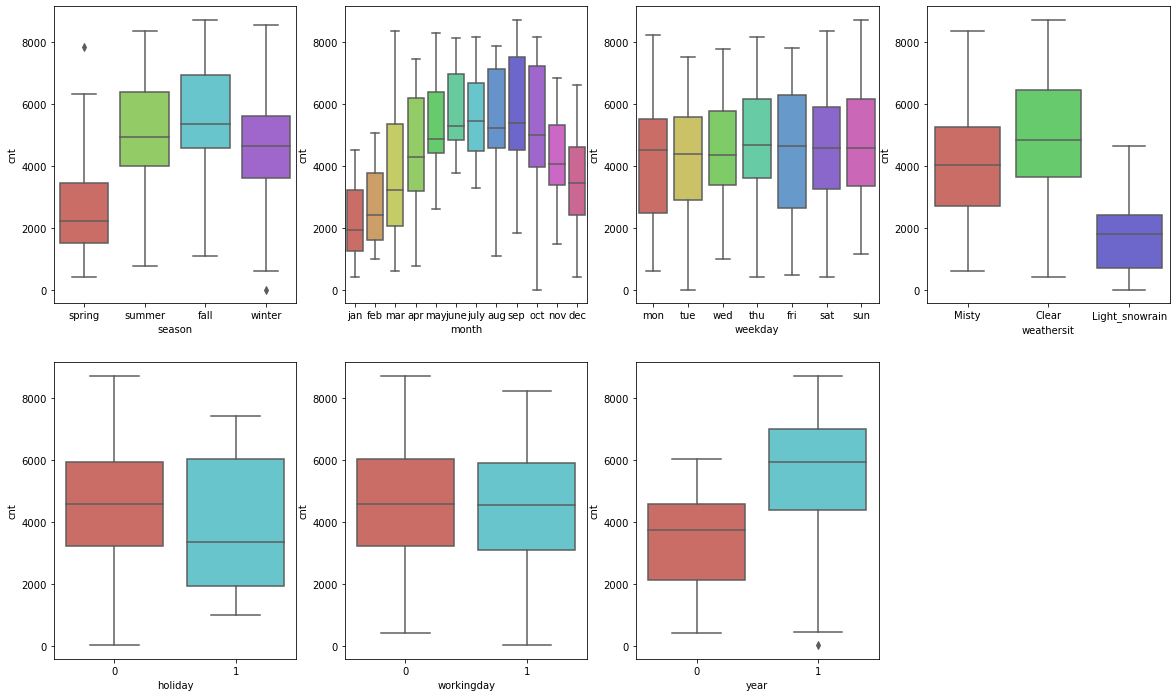

In [33]:
# Analysing/visualizing the categorical columns

plt.figure(figsize=(20, 12))
funsubplot(2,4,1,'season','cnt',dataframe)
funsubplot(2,4,2,'month','cnt',dataframe)
funsubplot(2,4,3,'weekday','cnt',dataframe)
funsubplot(2,4,4,'weathersit','cnt',dataframe)
funsubplot(2,4,5,'holiday','cnt',dataframe)
funsubplot(2,4,6,'workingday','cnt',dataframe)
funsubplot(2,4,7,'year','cnt',dataframe)
plt.show()

In [42]:
# plotting visualization for categorical column

def funbarplots(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=dataframe, palette="hls")
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=dataframe, hue='year',palette='husl')
    plt.legend(labels=['2018', '2019'])
    plt.show()

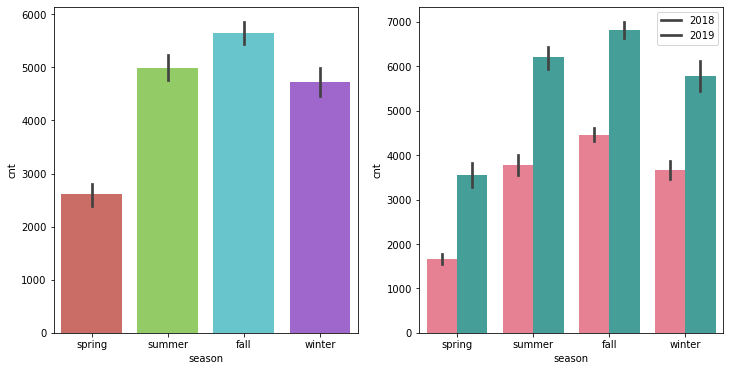

In [43]:
funbarplots('season')

Fall season seems to have attracted more booking than other seasons. And, in each season the booking count has increased from 2018 to 2019.

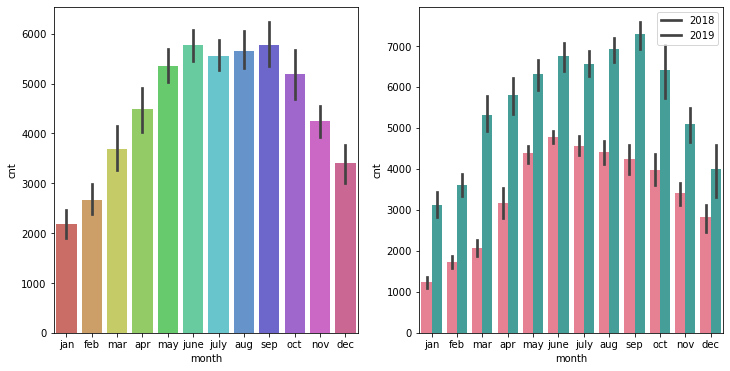

In [44]:
funbarplots('month')

Most of the bookings has been done during the month of May, June, July, Aug, Sep and Oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.
Number of booking for each month seems to have increased from 2018 to 2019.

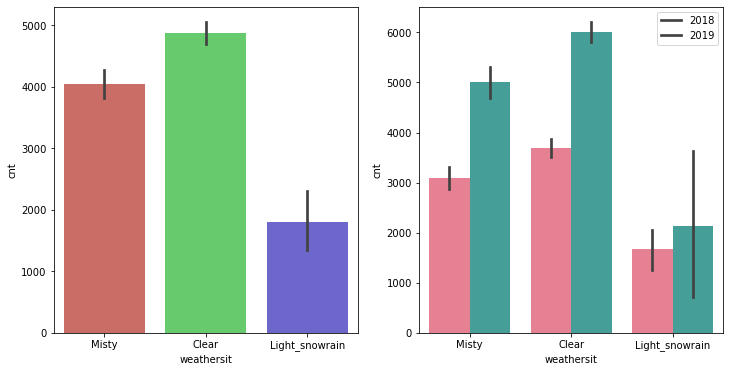

In [45]:
funbarplots('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

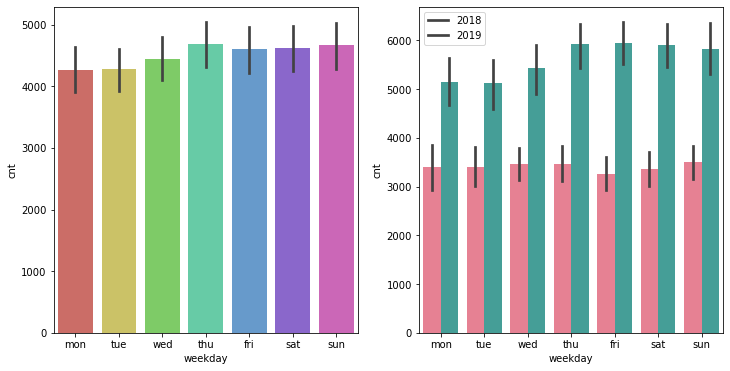

In [46]:
funbarplots('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

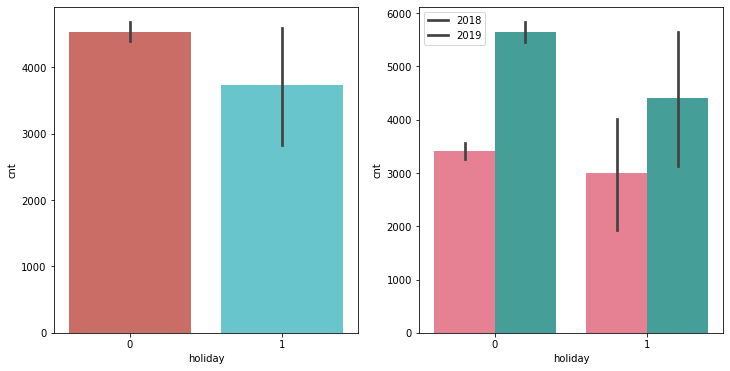

In [47]:
funbarplots('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

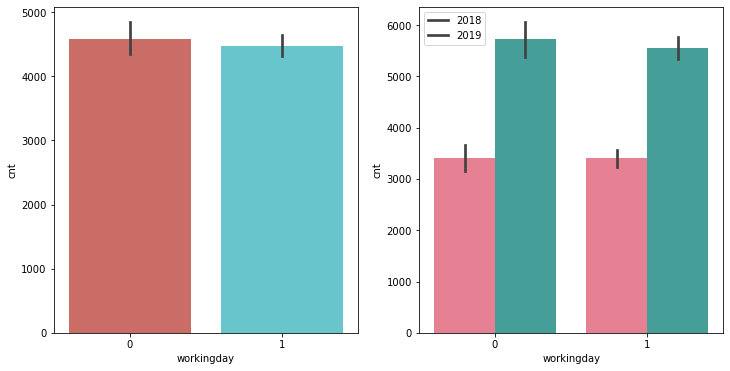

In [48]:
funbarplots('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

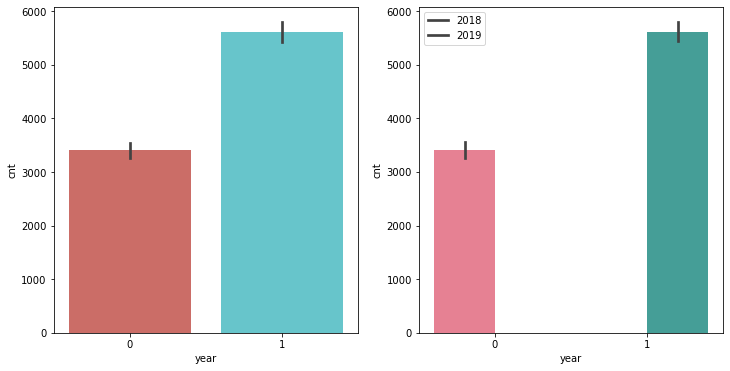

In [49]:
funbarplots('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

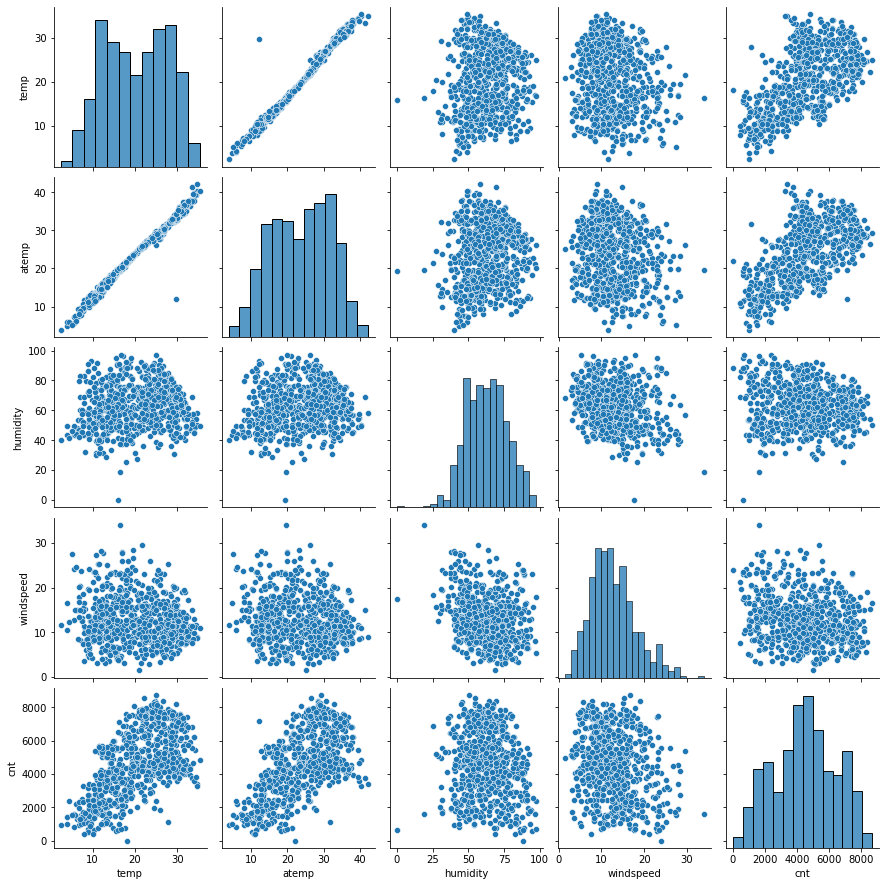

In [50]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=dataframe,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

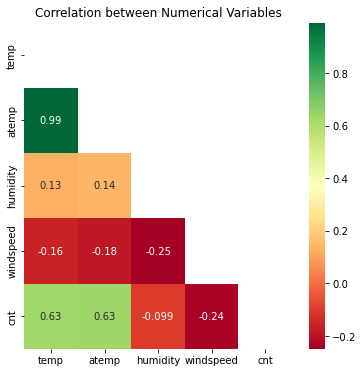

In [51]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(dataframe[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(dataframe[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Data Preparation

In [53]:
# Creation dummy variable for month, weekday, weathersit and season.

monthsDataframe = pd.get_dummies(dataframe.month,drop_first=True)
weekdaysDataframe = pd.get_dummies(dataframe.weekday,drop_first=True)
weathersitDataframe = pd.get_dummies(dataframe.weathersit,drop_first=True)
seasonsDataframe = pd.get_dummies(dataframe.season,drop_first=True)

In [56]:
# Merging  the dataframe, with the dummy variable dataset. 

mergedDataframe = pd.concat([dataframe,monthsDataframe,weekdaysDataframe,weathersitDataframe,seasonsDataframe],axis=1)

In [58]:
mergedDataframe.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [59]:
mergedDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [60]:
# Dropping unnecessary columns

mergedDataframe.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [61]:
mergedDataframe.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
mergedDataframe.shape

(730, 30)